In [15]:
import os
from pathlib import Path
import sys
from datasets import load_from_disk
from transformers import ViTImageProcessor
import numpy as np
sys.path.append(str(Path.cwd().parent))

In [2]:
from src.models.multiclassification.predict_model import ViTForMultiClassificationPredictor
from src.utils.dirutils import get_data_dir, get_models_dir

In [3]:
predictor = ViTForMultiClassificationPredictor(
    model_path="multiclassification/full/model-20230513_121917-35.pt",
    device="cuda:0",
    batch_size=1
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTModel: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
dataset = load_from_disk(get_data_dir() / "processed" / "multiclassification_dataset")

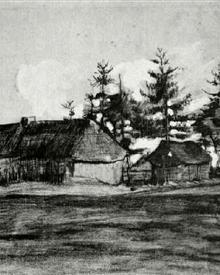

artist: ['vincent-van-gogh']
style: ['realism']
genre: ['landscape']
tags: ('House', 'countryside')
media: ()
artist: vincent-van-gogh
style: realism
genre: landscape
tags: ('House', 'Rural area', 'cottages-and-farmhouses')
media: ('paper', 'pencil')



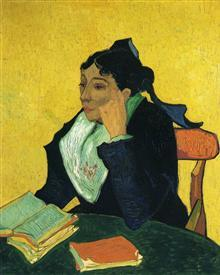

artist: ['vincent-van-gogh']
style: ['post-impressionism']
genre: ['portrait']
tags: ('female-portraits', 'reading-and-writing')
media: ('canvas', 'oil')
artist: vincent-van-gogh
style: post-impressionism
genre: portrait
tags: ('female-portraits',)
media: ('canvas', 'oil')



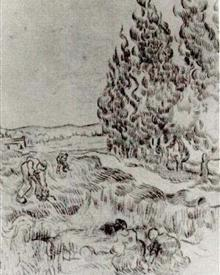

artist: ['vincent-van-gogh']
style: ['post-impressionism']
genre: ['sketch and study']
tags: ('Sketch', 'Tree', 'forests-and-trees', 'handwork')
media: ('chalk', 'paper')
artist: vincent-van-gogh
style: post-impressionism
genre: sketch and study
tags: ('Tree', 'fields-and-plains', 'forests-and-trees')
media: ('paper', 'pencil')



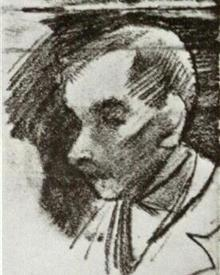

artist: ['vincent-van-gogh']
style: ['post-impressionism']
genre: ['sketch and study']
tags: ('Forehead', 'Nose', 'Sketch', 'male-portraits')
media: ('chalk', 'paper')
artist: vincent-van-gogh
style: realism
genre: sketch and study
tags: ('Forehead', 'Head', 'Jaw', 'Nose', 'Sketch', 'male-portraits')
media: ('chalk', 'paper')



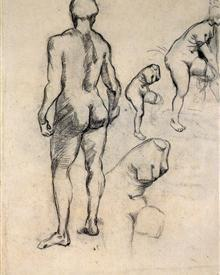

artist: ['vincent-van-gogh']
style: ['realism']
genre: ['sketch and study']
tags: ('Arm', 'Figure drawing', 'Human', 'Leg', 'Sketch', 'Standing', 'male-nude', 'monuments-and-statues')
media: ('chalk', 'paper')
artist: vincent-van-gogh
style: realism
genre: sketch and study
tags: ('Figure drawing', 'Human', 'Joint', 'Sketch', 'Standing', 'monuments-and-statues')
media: ('chalk', 'paper', 'pencil')



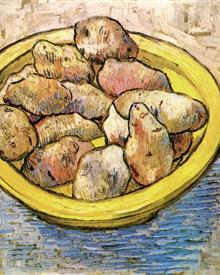

artist: ['vincent-van-gogh']
style: ['post-impressionism']
genre: ['still life']
tags: ('Food', 'food-and-beverages', 'fruits-and-vegetables')
media: ('canvas', 'oil')
artist: vincent-van-gogh
style: post-impressionism
genre: still life
tags: ('Food', 'fruits-and-vegetables')
media: ('canvas', 'oil')



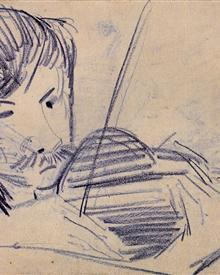

artist: ['vincent-van-gogh']
style: ['post-impressionism']
genre: ['sketch and study']
tags: ('Figure drawing', 'Nose', 'Sketch')
media: ('chalk', 'paper')
artist: other
style: cubism
genre: sketch and study
tags: ('Line', 'Sketch')
media: ('paper', 'pencil')



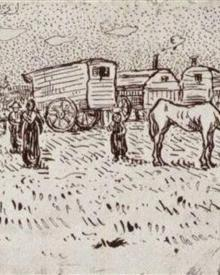

artist: ['vincent-van-gogh']
style: ['post-impressionism']
genre: ['sketch and study']
tags: ('Sketch', 'Text', 'animals', 'countryside', 'horses')
media: ('ink', 'paper')
artist: vincent-van-gogh
style: post-impressionism
genre: sketch and study
tags: ('countryside', 'handwork')
media: ('ink', 'paper')



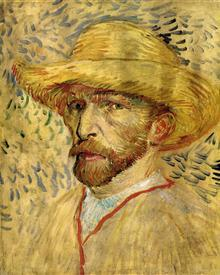

artist: ['vincent-van-gogh']
style: ['post-impressionism']
genre: ['self-portrait']
tags: ('Facial hair', 'famous-people', 'male-portraits')
media: ('canvas', 'oil')
artist: vincent-van-gogh
style: post-impressionism
genre: self-portrait
tags: ('famous-people', 'male-portraits')
media: ('canvas', 'oil')



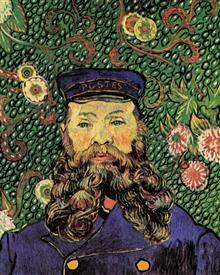

artist: ['vincent-van-gogh']
style: ['post-impressionism']
genre: ['portrait']
tags: ('Beard', 'Facial hair', 'male-portraits')
media: ('canvas', 'oil')
artist: vincent-van-gogh
style: post-impressionism
genre: portrait
tags: ('Beard', 'Facial hair', 'male-portraits')
media: ('canvas', 'oil')



: 

In [42]:
j = 0
for example in dataset["test"]:
    artist = predictor.ordinal_encoders["artist"].inverse_transform([example["artist"]])[0]
    if artist == "vincent-van-gogh" and j < 10:
        j += 1
        image = example["image"]
        display(image)
        for k, v in example.items():
            if k in ("image", "file_name"):
                continue
            if k in ("artist", "genre", "style"):
                x = predictor.ordinal_encoders[k].inverse_transform([v])[0]
            elif k in ("tags", "media"):
                x = predictor.multilabel_binarizers[k].inverse_transform(np.array([v]))[0]
            print(f"{k}: {x}")
        
        predictions = predictor.predict(image)
        for k, v in predictions[0].items():
            print(f"{k}: {v.item()}")
        for k, v in predictions[1].items():
            print(f"{k}: {v}")
        print("")

In [10]:
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

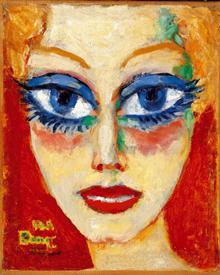

artist: george-stefanescu
style: expressionism
genre: portrait
tags: ('Cheek', 'Face', 'Head', 'Nose')
media: ('canvas', 'oil')



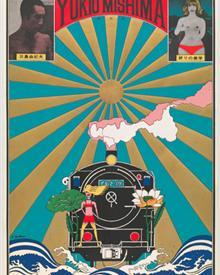

artist: other
style: pop art
genre: figurative
tags: ()
media: ()



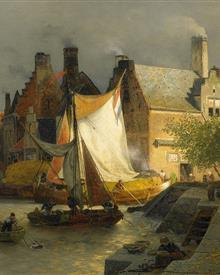

artist: other
style: romanticism
genre: cityscape
tags: ('Boat', 'Vehicle')
media: ('canvas', 'oil')



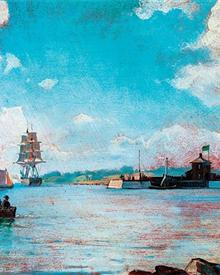

artist: other
style: realism
genre: marina
tags: ('Boat', 'Sky', 'Vehicle', 'Watercraft')
media: ('canvas', 'oil')



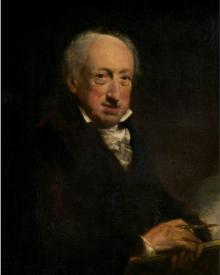

artist: thomas-lawrence
style: romanticism
genre: portrait
tags: ('Gentleman',)
media: ('canvas', 'oil')



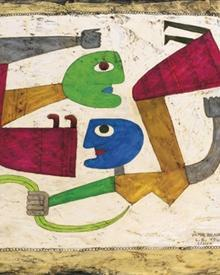

artist: victor-brauner
style: surrealism
genre: figurative
tags: ()
media: ('canvas', 'oil')



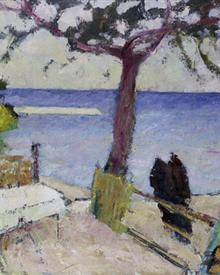

artist: other
style: post-impressionism
genre: genre painting
tags: ('Tree',)
media: ('canvas', 'oil')



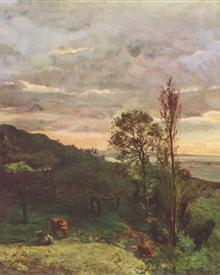

artist: paul-gauguin
style: impressionism
genre: landscape
tags: ('Natural landscape', 'Sky', 'Tree')
media: ('canvas', 'oil')



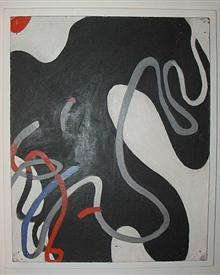

artist: other
style: abstract expressionism
genre: abstract
tags: ()
media: ('oil',)



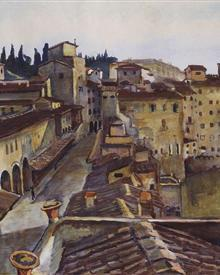

artist: zinaida-serebriakova
style: expressionism
genre: cityscape
tags: ('Building', 'Human settlement', 'houses-and-buildings')
media: ('canvas', 'oil')



In [30]:
for example in dataset["test"].select(range(10)):
    image = example["image"]
    display(image)
    predictions = predictor.predict(image)
    for k, v in predictions[0].items():
        print(f"{k}: {v.item()}")
    for k, v in predictions[1].items():
        print(f"{k}: {v}")
    print("")